# Separate the spectra in groups according to their behavior

Inicialmente os espectros serão agrupados como:
- G1: Dominado por starburts: sobe sempre para o azul
- G2: Sobe para o azul e um pouco para o vermelho
- G3: Sobe muito para o vermelho
- G4: Muito ruído; não possível de identificar visualmente; ou erro na normalização

## Inspeção visual

In [249]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
## importing libraries
from functions import load_spectrum, plot_spectrum_ax, make_spectrum_panel, plot_overlaid_spectra
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import pandas as pd

In [251]:
groups_df = pd.read_csv('groups.csv')
groups_df


,file,z,group
0,capers-cos07-v4_prism-clear_6368_43711.spec.fits,4.420440,G2
1,capers-cos10-v4_prism-clear_6368_119334.spec.fits,9.294025,G3
2,capers-cos10-v4_prism-clear_6368_30440.spec.fits,3.504500,G2
3,capers-cos10-v4_prism-clear_6368_32659.spec.fits,4.442170,G2
4,capers-cos13-v4_prism-clear_6368_160387.spec.fits,6.380030,G4
...,...,...,...
116,uncover-v4_prism-clear_2561_28876.spec.fits,7.036244,G2
117,uncover-v4_prism-clear_2561_38108.spec.fits,4.968462,G1
118,uncover-v4_prism-clear_2561_4286.spec.fits,5.835225,G2
119,uncover-v4_prism-clear_2561_45924.spec.fits,4.463361,G3


In [252]:
groups_df['group'].value_counts()

group
G2    51
G3    28
G1    22
G4    20
Name: count, dtype: int64

In [253]:
g1_df = groups_df[groups_df['group']=='G1']
g2_df = groups_df[groups_df['group']=='G2']
g3_df = groups_df[groups_df['group']=='G3']
g4_df = groups_df[groups_df['group']=='G4']

In [254]:
# Create a list of tuples to use with the functions
g1_zip = list(zip(g1_df['file'], g1_df['z']))
g2_zip = list(zip(g2_df['file'], g2_df['z']))
g3_zip = list(zip(g3_df['file'], g3_df['z']))
g4_zip = list(zip(g4_df['file'], g4_df['z']))

In [255]:
print(type(g1_zip))
print(len(g1_zip))
print(g1_zip[:3])


<class 'list'>
22
[('capers-egs47-v4_prism-clear_6368_19300.spec.fits', 4.5332627), ('capers-egs53-v4_prism-clear_6368_10108.spec.fits', 6.6230583), ('capers-udsp1-v4_prism-clear_6368_23419.spec.fits', 5.5160136)]


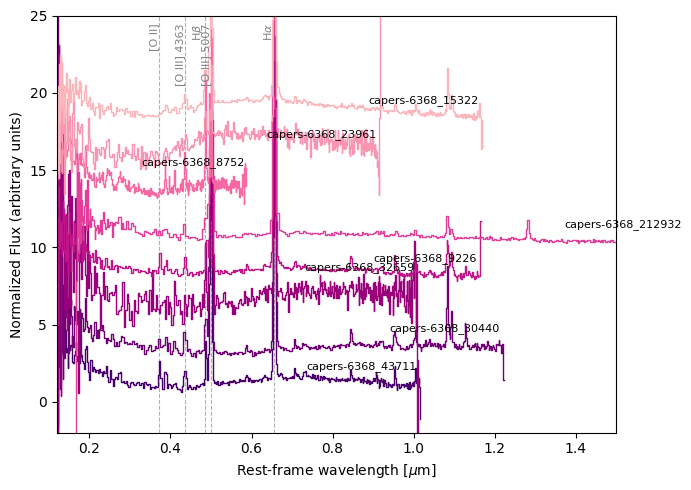

In [ ]:
fig = plot_overlaid_spectra(
    g2_zip,
    indices=range(0, 8),
    #offset=False,
    loader_kwargs=dict(
        input_flux_unit="uJy",
        wave_unit="um",
        restframe=True,
        normalize=True,
    ),
    xlim=(0.12, 1.5),
    ylim=(-2,25)
)
#plt.savefig('exemplos_grupos/g2_0.pdf')
plt.show()

